# Loading Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import json
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from IPython.display import display, Math, Latex
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.width', 450)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

# Loading Data via function line by line
As we have large amounf data so we are loading data line by line in dataframe business_df, review_df, user_df

In [2]:
import json

def readjson(filepath):
    data = []
    i=0
    with open(filepath,encoding="utf8") as f:
            for line in f: 
                data.append(json.loads(line))
                i +=1
    return pd.DataFrame(data)
data = readjson('./yelp_academic_dataset_business.json')



In [4]:
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


# Filtering data
Getting reaturants out of business dataframe based on Food category

In [6]:
data['categories'] = data['categories'].astype(str)
restaurant_df = data[data['categories'].str.contains('Food')==True]



In [7]:
restaurant_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:
restaurant_df.describe()

,latitude,longitude,stars,review_count,is_open
count,33405.000000,33405.000000,33405.000000,33405.000000,33405.000000
mean,36.850607,-88.719670,3.529726,60.555396,0.746834
std,6.004314,14.284284,0.958031,154.090381,0.434832
min,27.578363,-120.083748,1.000000,5.000000,0.000000
25%,32.178301,-90.294967,3.000000,10.000000,0.000000
50%,38.804645,-86.121636,3.500000,21.000000,1.000000
75%,39.954840,-75.404571,4.500000,54.000000,1.000000
max,53.679197,-74.661348,5.000000,7568.000000,1.000000


# EDA
Performing Exploratory data analysis

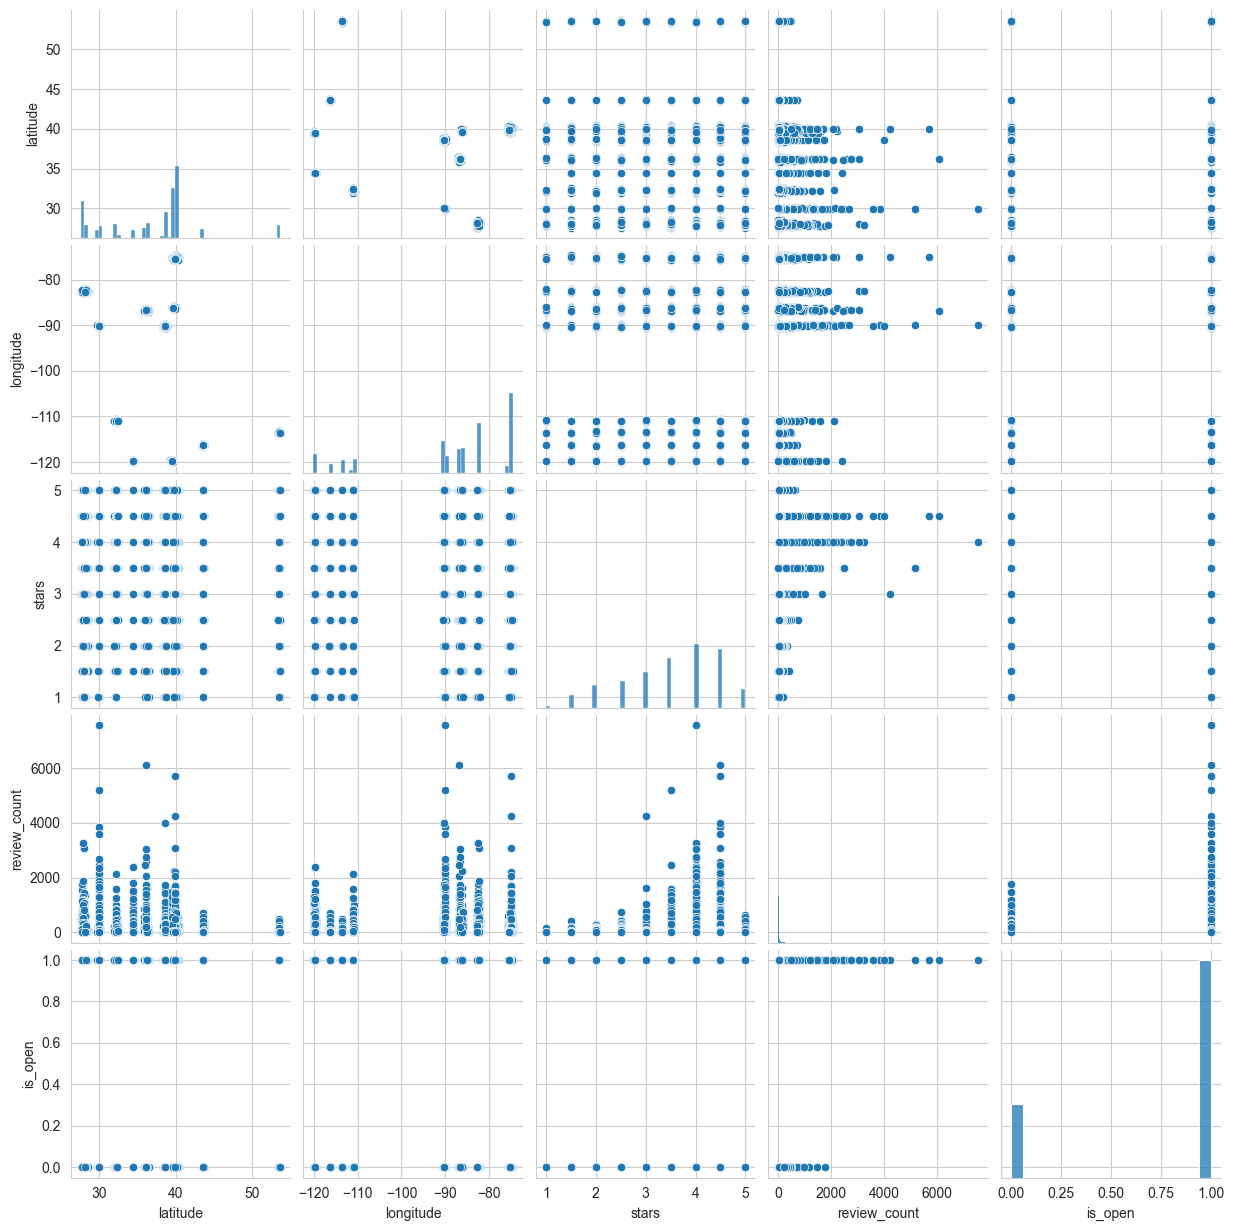

In [12]:
sns.pairplot(restaurant_df.iloc[:,:]);

## Distribution count of Restaurant rating 
We can see below more restaurants get 4 rating than other ratings

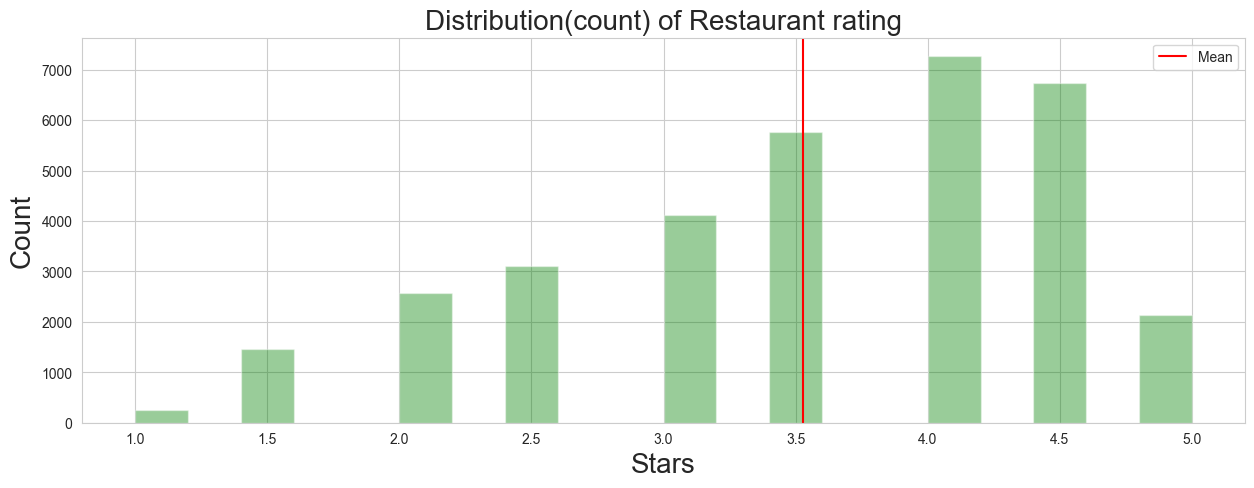

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

## Distribution count of Reviews rating for restaurants 
We can see below more reviews have 5 rating than other ratings

Text(0.5, 1.0, 'Distribution(count) of different Reviews rating')

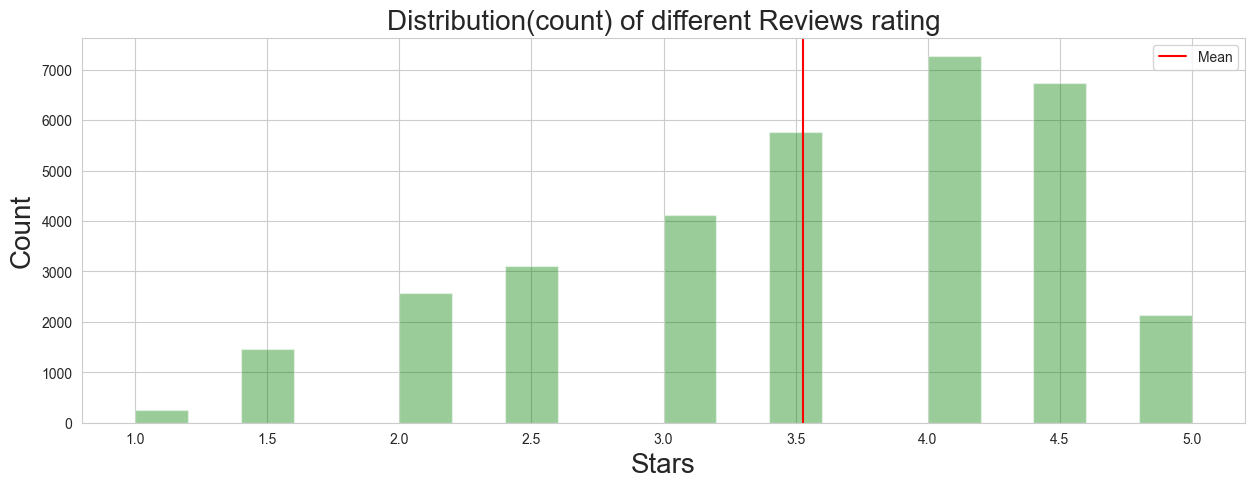

In [18]:
#review just for business which are restautrant


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of different Reviews rating',size=20)

## Most Reviewed Restaurant
Bouchon at the Venezia Tower is reviewed almost double as compared to others

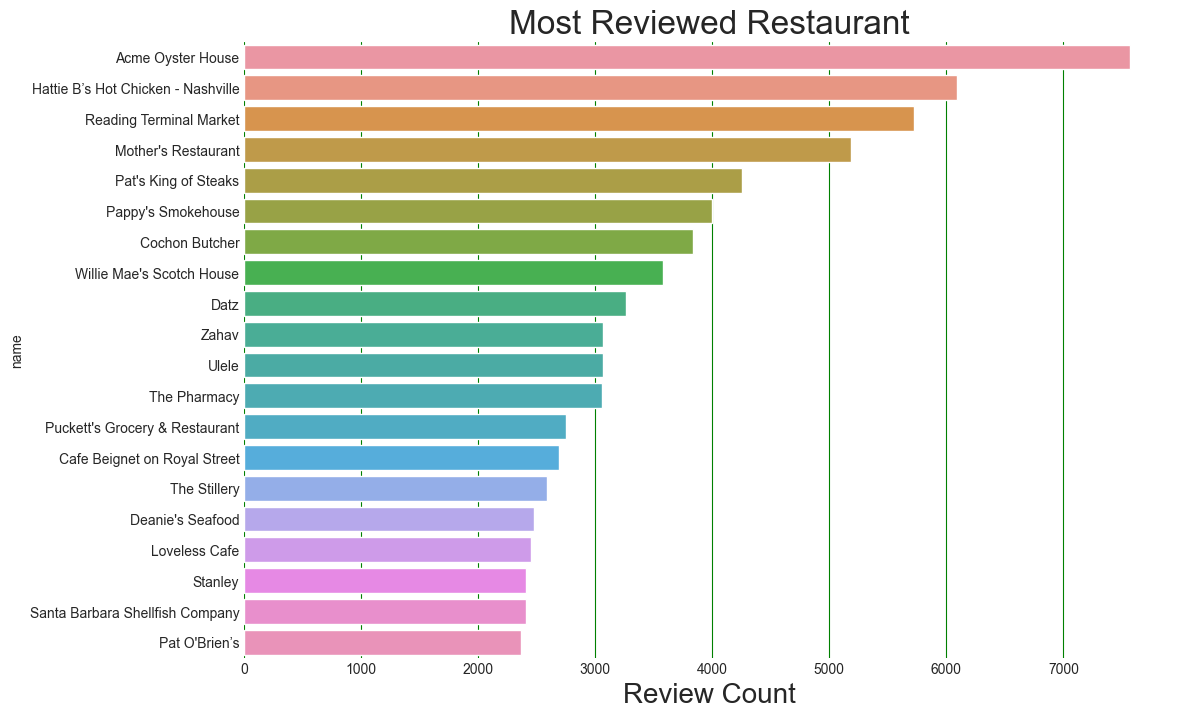

In [20]:
#get top 20 most reviewed restaurants
n_top =20
most_reviewed_restaurant = restaurant_df.nlargest(n_top, 'review_count')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_restaurant)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Most Reviewed Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)


## Top 10 5 star rated Restaurant
Poke Express is the top 5 star rated restaurant

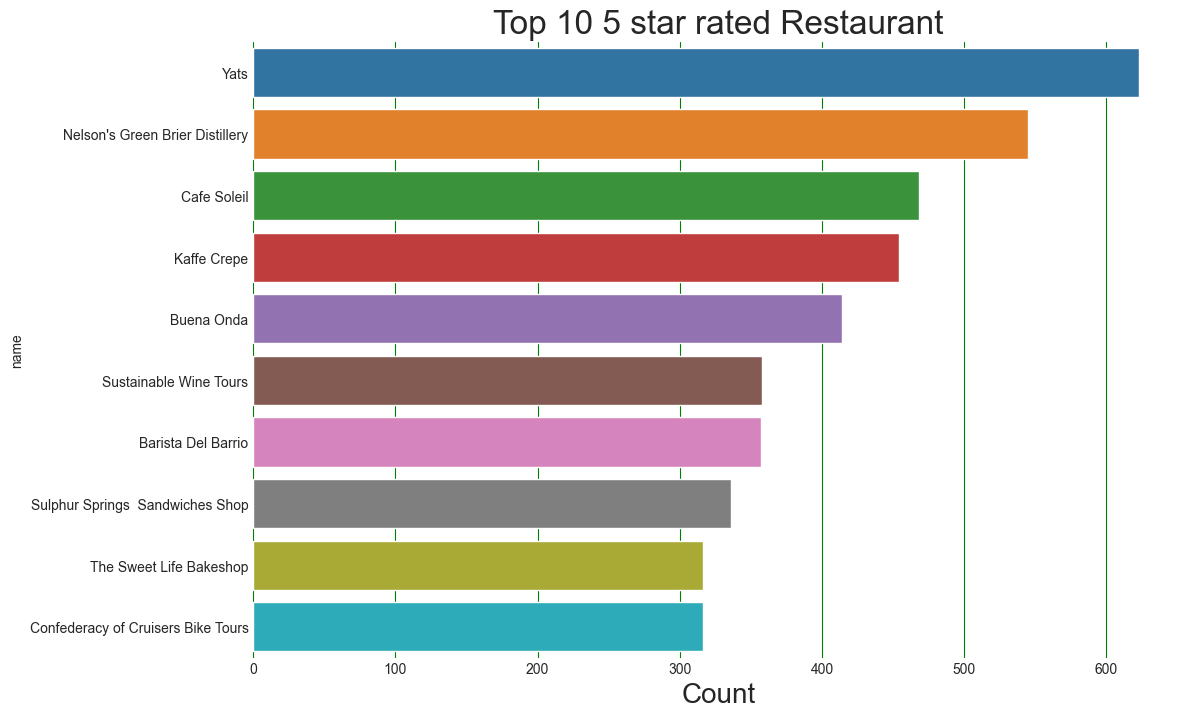

In [21]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 10 5 star rated restaurant
n_top =10
top_rated_restaurant = top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Getting different food categories from the restaurant dataframe

In [22]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#top_rated_restaurant

In [23]:
def get_food_type_count(category):
    count = restaurant_df[restaurant_df['categories'].str.contains(category)==True]['business_id'].count()
    return count


In [24]:
food_dict = {}
food_categories = ['American','Italian','Mexican','Chinese','Thai','Indian','Japan','French']
for food_category in food_categories:
    food_dict[food_category] = get_food_type_count(food_category)
    


## Distribution of review count with respect to Food Categories
We can see American restaurant have higher count of reviews followed by Mexican

Text(0, 0.5, 'Count')

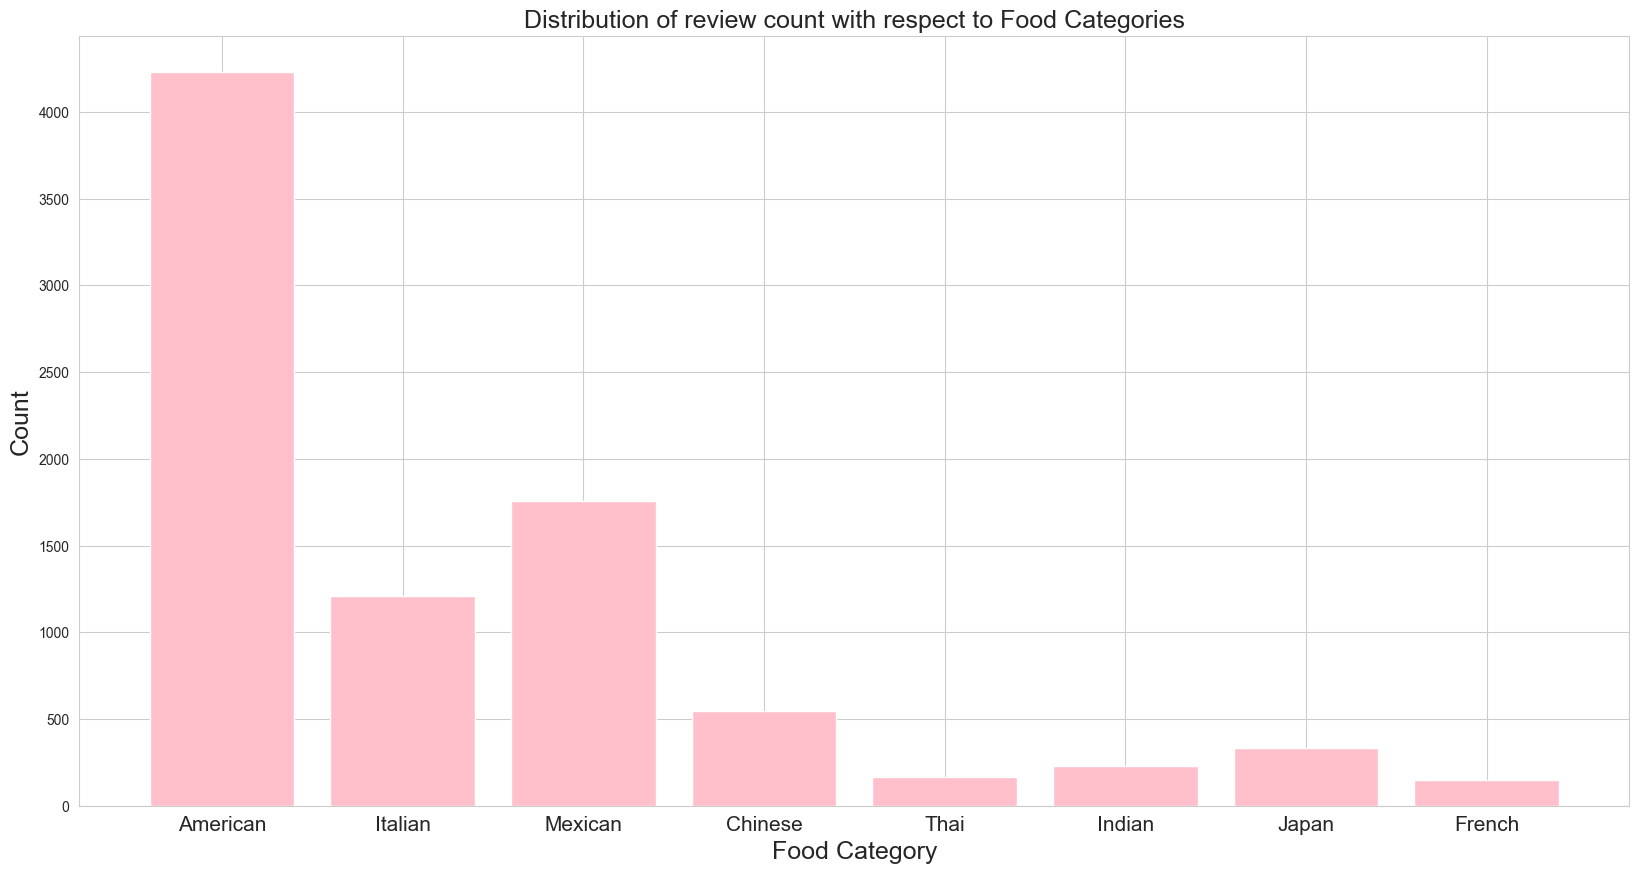

In [26]:
plt.figure(figsize=(20,10))
plt.bar(range(len(food_dict)), food_dict.values(), align='center',color='pink')
plt.xticks(range(len(food_dict)), list(food_dict.keys()),fontsize = 15);
plt.title('Distribution of review count with respect to Food Categories',fontsize=18)
plt.xlabel('Food Category',fontsize=18)
plt.ylabel('Count',fontsize=18)


## Distribution(count) of American, Mexican, Italian, Indian Restaurant rating
We can see American and Italian restaurants are rated higher than other restaurants

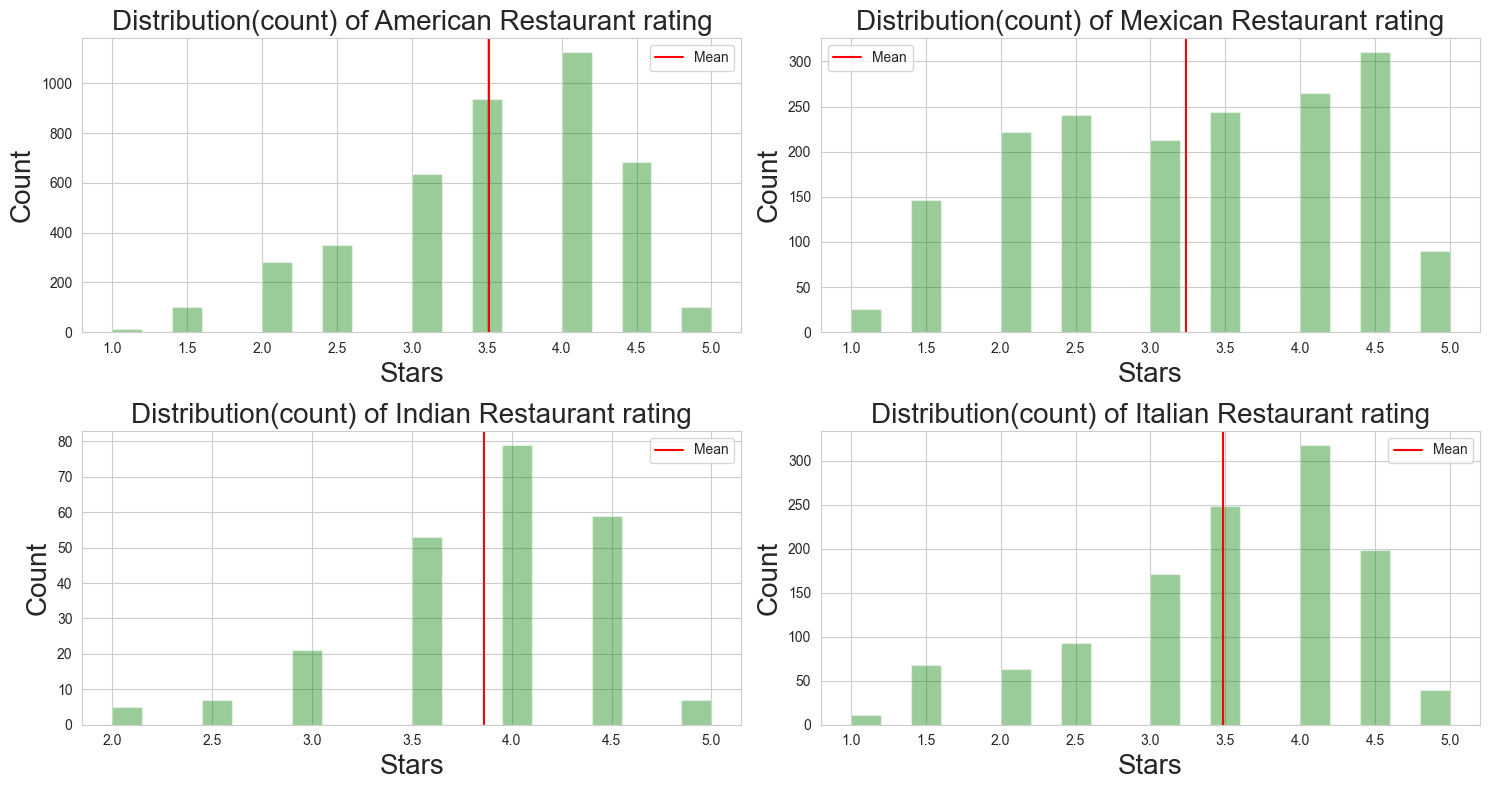

In [29]:
American_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('American')==True][['business_id','stars','categories','name','review_count']]
Mexican_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Mexican')==True][['business_id','stars','categories','name','review_count']]
Indian_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Indian')==True][['business_id','stars','categories','name','review_count']]
Italian_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Italian')==True][['business_id','stars','categories','name','review_count']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.ravel()

def restaurant_category(df, title, ax):

    sns.distplot(df.stars,kde=False,color = 'g',ax =ax,bins=20);
    ax.axvline(df.stars.mean(), 0, 1, color='r', label='Mean')
    ax.legend();
    ax.set_ylabel('Count',size=20)
    ax.set_xlabel('Stars',size=20)
    ax.set_title('Distribution(count) of '+ title + ' Restaurant rating',size=20);

restaurant_category(American_restaurant_rating_df, 'American', ax[0])
restaurant_category(Mexican_restaurant_rating_df, 'Mexican', ax[1])
restaurant_category(Chinese_restaurant_rating_df, 'Indian', ax[2])
restaurant_category(Italian_restaurant_rating_df, 'Italian', ax[3])

plt.tight_layout()

In [30]:
Indian_restaurant_rating_df.head(2)

,business_id,stars,categories,name,review_count
319,f82dhKNiUXsDVPMLqKYiIQ,4.0,"Restaurants, Salad, Pakistani, Indian, Cocktai...",Sher-e-Punjab,446
1275,N1ZXhAVzOzbyCBPEXTaUUw,3.5,"Food Delivery Services, Halal, Food, Restauran...",Tandoor Authentic Indian Restaurant,148


## Top 20 American 5 star rated Restaurant

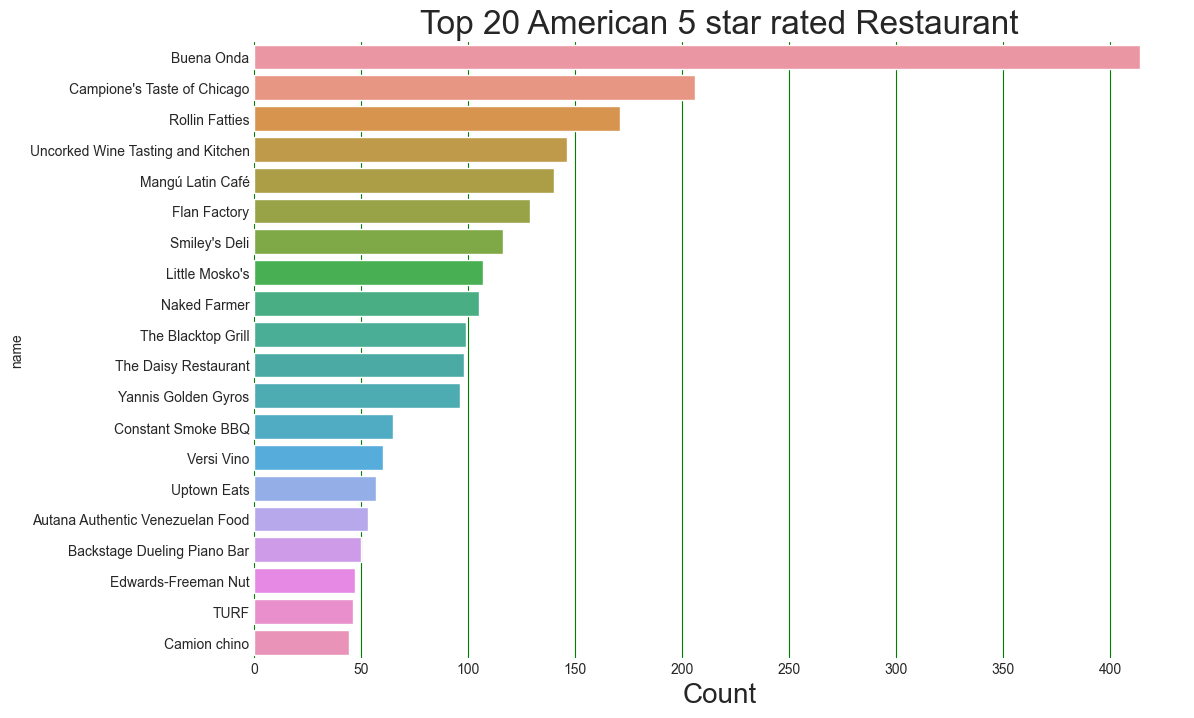

In [31]:
American_top_rated_restaurant = American_restaurant_rating_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 20 5 star rated restaurant
n_top =20
American_top_rated_restaurant = American_top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=American_top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 20 American 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

## Top 20 Indian 5 star rated Restaurant

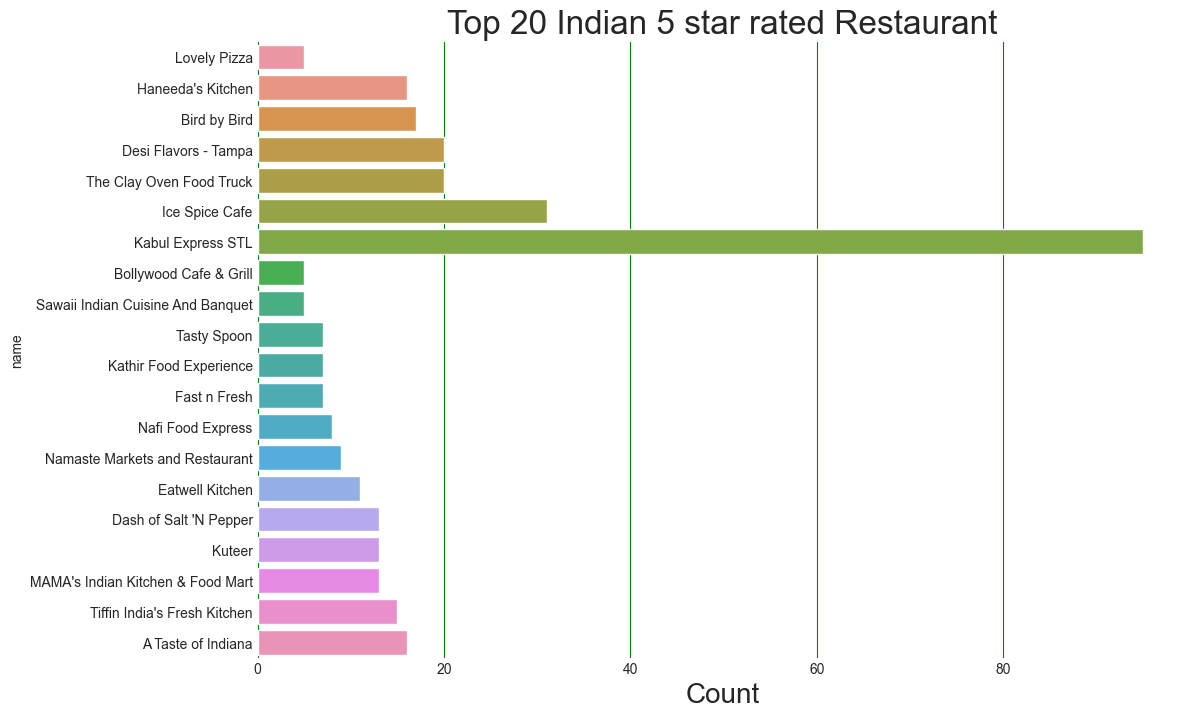

In [34]:
Indian_top_rated_restaurant = Indian_restaurant_rating_df.sort_values(by=['stars','review_count'],
                                                 ascending=True)[['name','business_id','review_count','stars']]
#get top 20 5 star rated restaurant
n_top =20
Indian_top_rated_restaurant = Indian_top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=Indian_top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 20 Indian 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)